In [5]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import random

import numpy as np

import matplotlib.cm as cm

import pickle

from utils import functions

# parameters setup 
from global_vars import global_vars

%matplotlib notebook

In [6]:
global_vars.init()

In [7]:
# -PARAMETERS FOR GENERATION-

# image dimensions
global_vars.image_dimensions = torch.Size([256,256])

# reps in a series 
global_vars.series_size = 1000

global_vars.blobs_population_sizes = torch.tensor([3,30,300])
global_vars.peak_values = torch.tensor([10,100,1000])

<IPython.core.display.Javascript object>


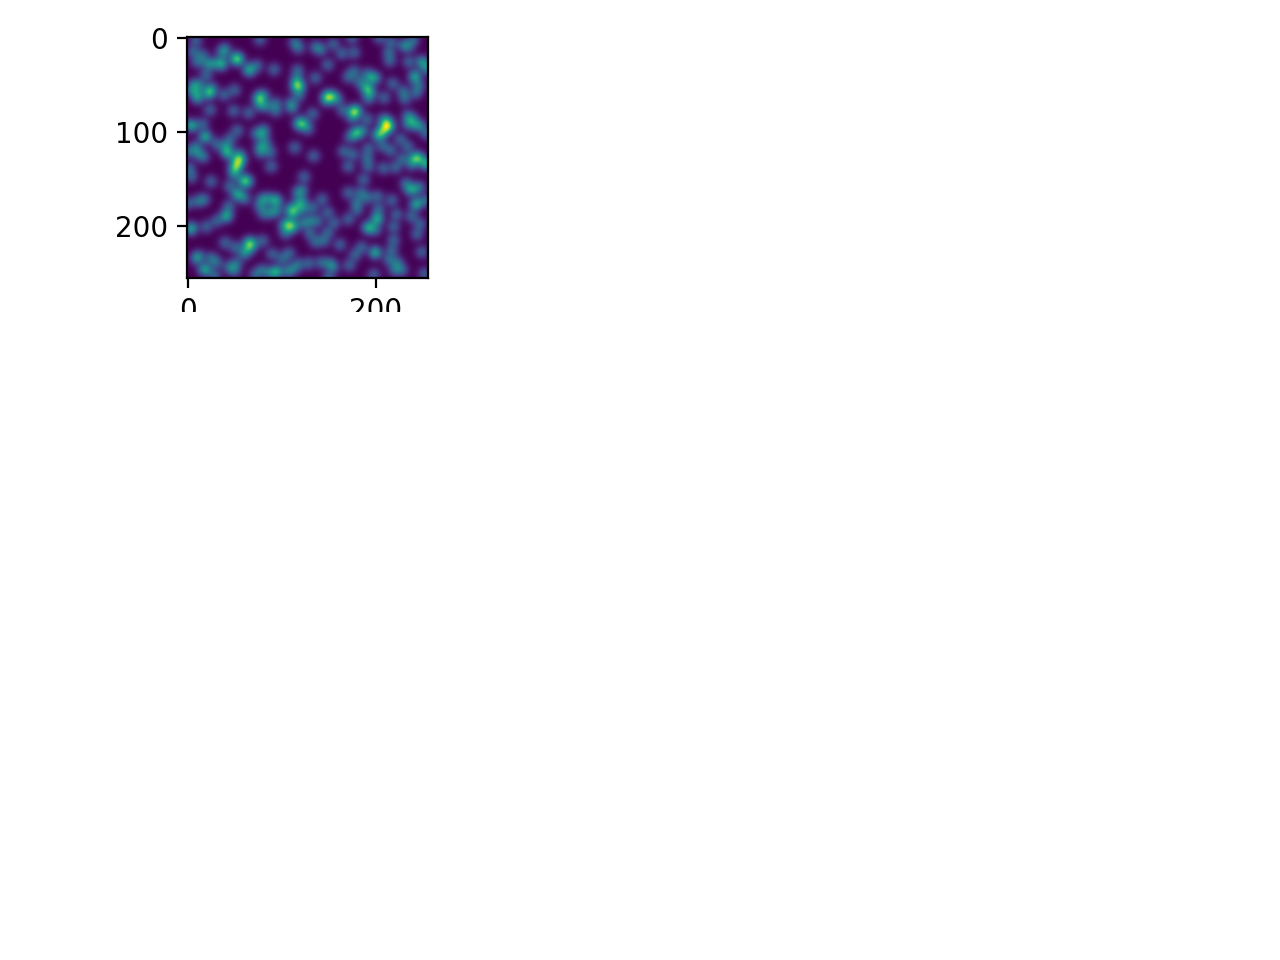

torch.Size([3, 1000, 256, 256])
tensor(0.)
tensor(5.8478)


In [8]:
# -TRAINING IMAGES GENERATION-

# 1. Generating n sets of randomly located blobs for varying quantities of blobs 
# (n = len(blobs_population_sizes))
# dims=[n, reps, img_x, img_y]
distinct_blob_quantities_td_27_06 = functions.varying_blob_quantities_img_series_generate(global_vars.series_size, global_vars.blobs_population_sizes, global_vars.image_dimensions)
# tests 
print(distinct_blob_quantities_td_27_06.shape)
print(distinct_blob_quantities_td_27_06.min())
print(distinct_blob_quantities_td_27_06.max())

# 2. Generating m sets of images with different peak values and applying poisson noise to them 
# (m = len(peak_values))
# dims=[2, m, n, reps, img_x, img_y]
# 2a. 
distinct_peaks_and_blob_quantities_td_27_06 = functions.varying_peak_values_apply(distinct_blob_quantities_td_27_06, global_vars.peak_values)
# 2b.
un_noised_images_td_27_06 = functions.background_offset_apply(distinct_peaks_and_blob_quantities_td_27_06, 10)
# 2c.
noised_images_td_27_06 = functions.noise_apply(un_noised_images_td_27_06)

# 3. Generating indices for m peak values and n blob quantities reflective of the arragngement of the n x m sets 
# dims=[2, m, n]
indices_td = functions.indices_generate(noised_images_td_27_06)

In [9]:
# storing generated data
noised_images_td_27_06_pickled = pickle.dump(noised_images_td_27_06, open("pickled_data/training_data/noised_images_td_27_06.pkl", 'wb'), protocol=4)
%store noised_images_td_27_06_pickled

un_noised_images_td_27_06_pickled = pickle.dump(un_noised_images_td_27_06, open("pickled_data/training_data/un_noised_images_td_27_06.pkl", 'wb'), protocol=4)
%store un_noised_images_td_27_06_pickled

%store indices_td

Stored 'noised_images_td_27_06_pickled' (NoneType)
Stored 'un_noised_images_td_27_06_pickled' (NoneType)
Stored 'indices_td' (Tensor)


In [11]:
print(noised_images_td_27_06.shape)

torch.Size([3, 3, 1000, 256, 256])


In [12]:
import os
from tifffile import imwrite

for n in range(noised_images_td_27_06.shape[0]):
    for m in range(noised_images_td_27_06.shape[1]):
        for i in range(noised_images_td_27_06.shape[2]):
            savepath = 'tiffed_data/training_data/noised'
            filename = '{}_{}_{}.tif'.format(n,m,i)

            savename = os.path.join(savepath, filename)
            im = np.asarray(noised_images_td_27_06[n,m,i,:,:].numpy().astype(np.single))
            
            #photometric='minisblack'
            imwrite(savename, im)

In [13]:
for n in range(un_noised_images_td_27_06.shape[0]):
    for m in range(un_noised_images_td_27_06.shape[1]):
        for i in range(un_noised_images_td_27_06.shape[2]):
            savepath = 'tiffed_data/training_data/un_noised'
            filename = '{}_{}_{}.tif'.format(n,m,i)

            savename = os.path.join(savepath, filename)
            im = np.asarray(un_noised_images_td_27_06[n,m,i,:,:].numpy().astype(np.single))
            
            #photometric='minisblack'
            imwrite(savename, im)